<h1>Agent Based Modeling (ABM)</h1>

In this tutorial, we will build our first simple Agent Based Models using the commands in the notebook. We will create a simple model, agents. After, those agents will interact randomly with other agents. And we simulate some changes in the community over multiple interactions.

Our model will represent the United States presidential election. <b> Trump vs Biden </b>

In each interaction, one agent (the influencer)influences another agent. And this interaction produce one of two possible opinion according to their existing representations.


In [92]:
import random
from copy import deepcopy
from numpy.random import choice
import numpy as np
import ipywidgets as ipw
import ipywidgets as widgets
%matplotlib inline 
import matplotlib.pyplot as plt


# Setting the parameters

opinion = ['Trump', 'Biden'] # opinion[0]= Trump, opinion[1]=Biden


personalities = ['Flex', 'Stub'] # personalities[0]= Flexible, personalities[1]=Stubborn

# For examaple, we can create a flexible agent who is Trump's supporter. 

agent_one = (personalities[0], opinion[0])
print(agent_one)

('Flex', 'Trump')


<b>There are four different types of the agent;</b>
<ul>
<li>Trump supporter who is flexible</li>
<li>Trump supporter who is stubborn</li>

<li>Biden supporter who is flexible</li>    
<li>Biden supporter who is stubborn</li>
</ul>




In [93]:
# Create a function that generates a population of N agents with a given probabilistic distribution.


pop_size = widgets.Text()            # popuation size
ratio = widgets.Text()               # the ratio of Biden supporters to Trump supporters in the population
T_sup_per_ratio = widgets.Text()     # the ratio of Stubborn personalities to Flexible in Trump's supporters
B_sup_per_ratio = widgets.Text()     # the ratio of Stubborn personalities to Flexible in Biden's supporters


def make_population_random(N, R, T_R, B_R):
    pop_size.value = str(N)
    ratio.value = str(R)
    T_sup_per_ratio.value = str(T_R)
    B_sup_per_ratio.value = str(B_R)
    
    population = []
    
    
    for i in range(N):
        s = np.random.binomial(1, R, 1)
        if s == 0:
            trump_per = np.random.binomial(1, T_R, 1)
            p = personalities[trump_per[0]]
        else:
            biden_per = np.random.binomial(1, B_R, 1)
            p = personalities[biden_per[0]]
        
        o = opinion[s[0]]
        
        
        agent = [p, o]
        
        population.append(agent)

    return population

<h3> AGENTS </h3>


Call the function to make a population of some agents. Define 4 different variables.

<ol>
<li>Popuation size</li>
<li>The ratio of Biden supporters to Trump supporters in the population</li>
<li>The ratio of Stubborn personalities to Flexible in Trump's supporters</li>
<li>The ratio of Stubborn personalities to Flexible in Biden's supporters</li>
</ol>


In [101]:
layout = ipw.Layout(width='100%')
style = {'description_width': 'initial'}
ipw.interact(make_population_random,
             N=ipw.IntSlider(value=200, min=50, max=5000, step=50, continuous_update=False,
                             description="Population Size", style=style, layout=layout),
             R=ipw.FloatSlider(value=0.5, min=0, max=1, step=0.1, continuous_update=False,
                                   description="Biden Supporters Ratio in the Pop T => B ", style=style, layout=layout),
             T_R=ipw.FloatSlider(value=0.5, min=0, max=1, step=0.1, continuous_update=False,
                                   description="The stubborn ratio in the Trump Sup F => S", style=style, layout=layout),
             B_R=ipw.FloatSlider(value=0.5, min=0, max=1, step=0.1, continuous_update=False,
                                   description="The stubborn ratio in the Biden Sup F => S", style=style, layout=layout)
             );

interactive(children=(IntSlider(value=200, continuous_update=False, description='Population Size', layout=Layo…

In [95]:
print(int(pop_size.value))

def count(population):
    T_supporter = 0. # must be a float!
    B_supporter = 0. # must be a float! 
    for agent in population:
        if agent[1] == 'Trump':
            T_supporter += 1 
        
    return T_supporter / len(population)

200


<h3> RULES </h3>

<ol>
<li>Choose a random agent and assign it as a listener</li>
<li>Choose a random agent agent and assign it as an influencer</li>
<li>If the listener is stubborn, pass the agent without making any changes.</li>
<li>If the listener is flexible, copy the influencer agent's opinion to the listener agent. </li>
</ol>



In [96]:

def choose_pair(population):
    i = random.randint(0, len(population) - 1) 
    j = random.randint(0, len(population) - 1)
    
    while i == j:
        j = random.randint(0, len(population) - 1) # make sure the same agent is not selected twice
        
    return population[i], population[j]

 

In [97]:

# Create a function that only updates agents using "pass" (which means do nothing in Python)
def interact(listener,producer): 
    
    if listener[1] == producer[1]:
        pass   # do nothing
    else:
        if listener[0]=='Stub':
            pass
        else:
            listener[1]=deepcopy(producer[1])

<h3>Simulation step </h3>


In [98]:
# Create a function that simulates a community of size N interacting randomly for K times       

def simulate( k):

    proportion = [] # make an empty list to keep track of the porportions after every interaction
    
    for i in range(k):
        
        pair = choose_pair(population) # choose a pair from the population
        
        interact(pair[0],pair[1])  # make the chosen pair interact
        
        proportion.append(count(population)) # track the proportion of the vowels in the population during intrtaction
    
    return population, proportion

<h3><span style="color:red">Run </span></h3>

Run the simulation with the current population and observe the changes in the opinions within the population.

The time of simulation was defined as 5000 as a default value. It can be changed.

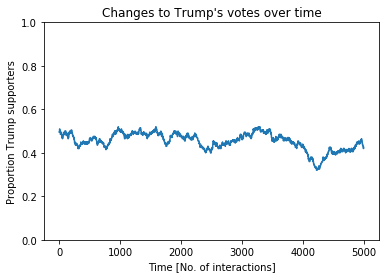

In [99]:

population = make_population_random(int(pop_size.value), float(ratio.value), float(T_sup_per_ratio.value), float(B_sup_per_ratio.value))


Simulation_time = 5000  # it can be changed.


new_population, proportion = simulate( Simulation_time)


plt.plot(proportion)

plt.title('Changes to Trump\'s votes over time')
plt.ylabel('Proportion Trump supporters')
plt.xlabel('Time [No. of interactions]')
plt.ylim(0,1)
plt.show()